In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default. 
sns.set_style('whitegrid')

### Currently reading only few row due to machine dependency.

In [41]:
# loading only a section of train data for analysis part
df_train=pd.read_csv(r'/Users/dr.anjitta/Documents/Databases/new-york-city-taxi-fare-prediction/train.csv',nrows=20000,parse_dates=["pickup_datetime"])
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [42]:
df_train.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
19995,2011-02-22 20:07:00.000000233,6.1,2011-02-22 20:07:00+00:00,-73.985163,40.747282,-73.974358,40.743270,2
19996,2013-11-04 22:45:00.00000065,38.5,2013-11-04 22:45:00+00:00,-73.783457,40.648702,-73.954360,40.620647,1
19997,2015-05-30 20:50:45.0000004,22.0,2015-05-30 20:50:45+00:00,-74.015404,40.709366,-73.978844,40.764610,1
19998,2011-09-02 12:40:00.00000072,12.5,2011-09-02 12:40:00+00:00,-73.973275,40.760405,-73.984875,40.711660,1
19999,2011-07-17 14:27:35.0000002,8.9,2011-07-17 14:27:35+00:00,-73.974628,40.741923,-73.985966,40.722214,1


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                20000 non-null  object             
 1   fare_amount        20000 non-null  float64            
 2   pickup_datetime    20000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   20000 non-null  float64            
 4   pickup_latitude    20000 non-null  float64            
 5   dropoff_longitude  20000 non-null  float64            
 6   dropoff_latitude   20000 non-null  float64            
 7   passenger_count    20000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [44]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,11.303321,-72.478584,39.921043,-72.497221,39.913606,1.658000
std,9.541637,10.525376,6.678592,10.460530,6.139231,1.283674
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992150,40.734706,-73.991224,40.734537,1.000000
50%,8.500000,-73.981711,40.752680,-73.980216,40.753583,1.000000
75%,12.500000,-73.966802,40.767443,-73.963729,40.768135,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [45]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [46]:
df_train=df_train[df_train['fare_amount']>=0]
len(df_train)

19997

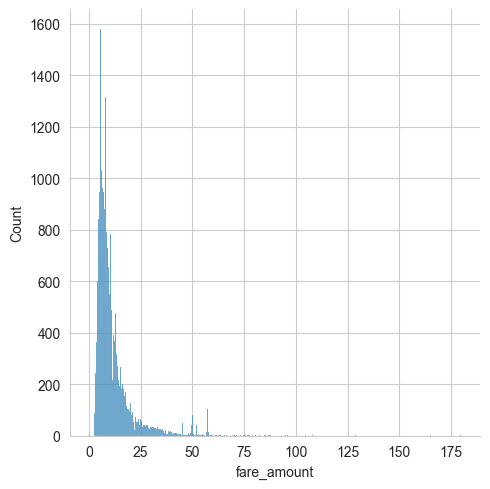

In [49]:
sns.displot(df_train['fare_amount'])

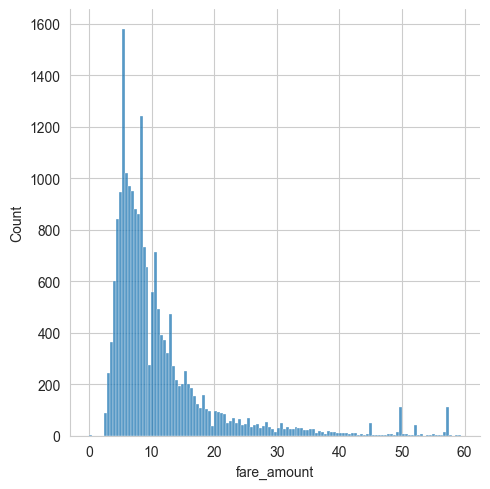

In [53]:
sns.displot(df_train[df_train['fare_amount']<60]['fare_amount'])

# removing the Missing data

In [56]:
df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

No null values found for the given observation otherwise we have to remove the corresponding rows 

# DO the sam for the test data

In [57]:
# loading only a section of train data for analysis part
df_test=pd.read_csv(r'/Users/dr.anjitta/Documents/Databases/new-york-city-taxi-fare-prediction/test.csv')
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [58]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


### New york city latitude and Longitude 
from web source



In [59]:
latitude=40.7141667
longitude=-74.0063889

In [63]:
longitude_min=min(df_test['pickup_longitude'].min(),df_test['dropoff_longitude'].min())
longitude_max=max(df_test['pickup_longitude'].max(),df_test['dropoff_longitude'].max())
longitude_min,longitude_max

(-74.263242, -72.986532)

In [64]:
latitude_min=min(df_test['pickup_latitude'].min(),df_test['dropoff_latitude'].min())
latitude_max=max(df_test['pickup_latitude'].max(),df_test['dropoff_latitude'].max())
latitude_min,latitude_max

(40.568973, 41.709555)

In [65]:
BB=(longitude_min,longitude_max,latitude_min,latitude_max)

In [66]:
def Bounding_box(df,BB):
    return (
        (
            df['pickup_longitude']>=BB[0] & df['pickup_longitude']<=BB[1]
        )
        (
            df['pickup_latitude']>=BB[2] & df['pickup_latitude']<=BB[2]
        )
        (
            df['dropoff_longitude']>=BB[0] & df['dropoff_longitude']<=BB[1]
        )
        (
            df['dropoff_latitude']>=BB[2] & df['dropoff_latitude']<=BB[2]
        )
    )

In [70]:
df_train[Bounding_box(df_train,BB)]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]